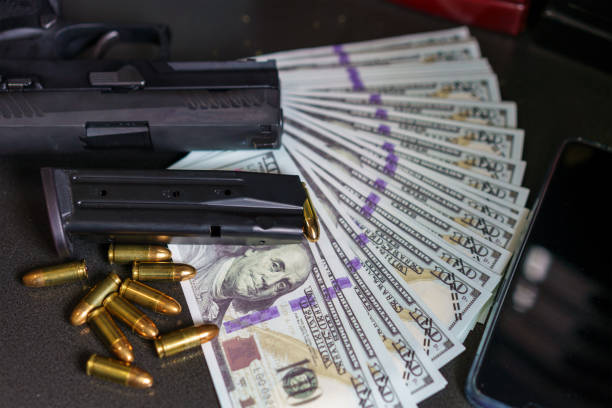

# Exploring Global Terrorism Trends: A Geospatial Analysis

### Introduction:
According to a recent survey, the world faces a dual challenge - natural and man-made calamities. Each year, an astonishing 218 million people are affected by these calamities, resulting in the tragic loss of approximately 68,000 lives. While the frequency of natural disasters such as earthquakes and volcanoes has remained relatively constant, a concerning trend emerges on the global stage - the steady growth in the number of terrorist activities over the years.

### Project Goals:
The primary aim of this notebook is to delve into the intricate world of global terrorism. Through the use of interactive plots and animations, we aim to make the exploration of this complex issue both accessible and informative. This project serves as a platform to analyze and understand the evolving landscape of terrorism worldwide.

The aim of this analysis is to provide answers to the following questions:

- `How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?`
- `How often the attack becomes a success?`
- `What are the most common methods of attacks? Does it differ in various regions or in time?`

Key Objectives:
1. **Terrorism Trends Over Time**: One of the core objectives is to visualize and analyze trends in terrorism over the years. This includes understanding how the frequency, intensity, and types of terrorist activities have evolved.

2. **Mapping Terrorism Prone Areas**: Utilizing the power of geospatial data, this project seeks to identify regions that are particularly susceptible to terrorist incidents. Geographic maps, created using Folium, will provide insights into the distribution of these events.

3. **Interactive Data Exploration**: Interactivity is at the heart of this notebook. Users will be able to interact with maps, zoom in on specific regions, and obtain detailed information about individual incidents.

4. **Limited Data Usage for Improved Performance**: Recognizing the computational challenges associated with handling extensive datasets, the project responsibly opts to work with a subset of the data, focusing on the first 5000 rows. This ensures a smoother user experience and prevents kernel crashes.

### Motivation:
The quest to understand and address the growing threat of terrorism is the driving force behind this project. Your engagement and support, through upvotes, provide the motivation needed to continually enhance this analysis.

### Conclusion:
Through this notebook, we embark on a journey to explore the ever-evolving landscape of global terrorism. By examining trends, identifying vulnerable regions, and offering interactive tools for exploration, we hope to contribute to a deeper understanding of this critical issue. Together, we can shed light on the challenges posed by terrorism and work towards a safer world.

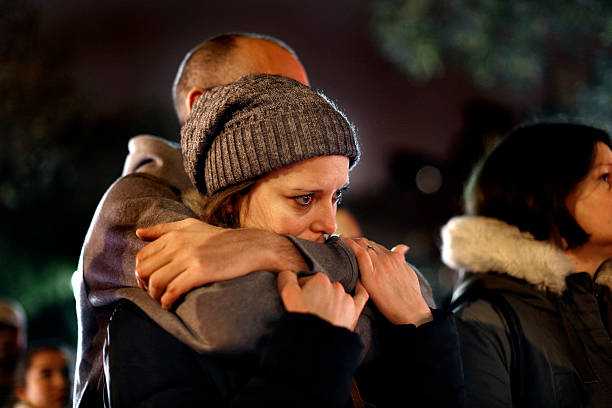

# About the dataset
The Dataset was extracted from the Global Terrorism Database (GTD) - an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.

## Explanation of selected columns:
- success - Success of a terrorist strike
- suicide - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident - was a suicide
- attacktype1 - The general method of attack
- attacktype1_txt - The general method of attack and broad class of tactics used.
- targtype1_txt - The general type of target/victim
- targsubtype1_txt - The more specific target category
- target1 - The specific person, building, installation that was targeted and/or victimized
- natlty1_txt - The nationality of the target that was attacked
- gname - The name of the group that carried out the attack
- gsubname - Additional details about group that carried out the attack like fractions
- nperps - The total number of terrorists participating in the incident
- weaptype1_txt - General type of weapon used in the incident
- weapsubtype1_txt - More specific value for most of the Weapon Types
- nkill - The number of total confirmed fatalities for the incident
- nkillus - The number of U.S. citizens who died as a result of the incident

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
# !pip install basemap
from mpl_toolkits.basemap import Basemap
from matplotlib import animation,rc
import base64
import warnings
warnings.filterwarnings('ignore')

# 1.1 Gathering Data

In [3]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
df.shape

(181691, 135)

In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


# 1.2 Data Preprocessing 

In [8]:
# Renaming Columns 

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

In [9]:
# As we have many columns, we take the columns that are necessary for analysis
df = df[['eventid','Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [10]:
df['Killed'].sample(10)

117440    1.0
104385    2.0
15961     0.0
9314      4.0
59667     0.0
85501     6.0
173914    0.0
80349     3.0
75203     NaN
113796    0.0
Name: Killed, dtype: float64

**Create a new column 'casualties' by adding 'killed' and 'wounded'**

In [11]:
df['casualities']=df['Killed']+df['Wounded']
df.head(3)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,...,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success,casualities
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1,1.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1,1.0


In [12]:
df.shape

(181691, 21)

In [13]:
df.isna().sum()

eventid             0
Year                0
Month               0
Day                 0
Country             0
Region              0
state             421
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
success             0
casualities     16874
dtype: int64

In [14]:
df.describe()

,eventid,Year,Month,Day,latitude,longitude,Killed,Wounded,success,casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,181691.000000,164817.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,0.889598,5.296128
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,0.313391,42.069023
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,1.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,1.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,1.000000,9574.000000


# 2.0 Exploratory Data Analysis

 ## Number Of Terrorist Acticity Each Years

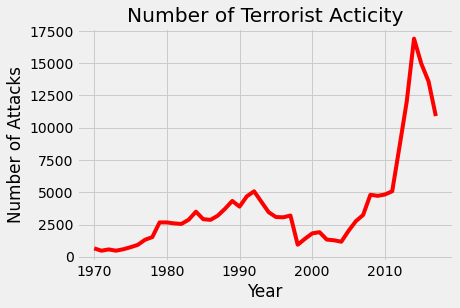

In [15]:
year_attacks = df.groupby('Year').size().reset_index(name='count')
sns.lineplot(x='Year', y='count', data=year_attacks, color='red')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title("Number of Terrorist Acticity")
plt.show()

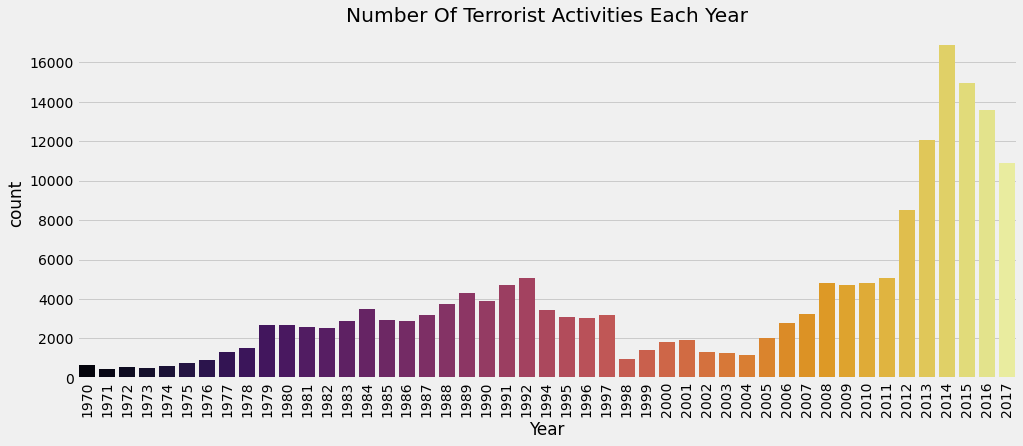

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot(data=df, x='Year', palette='inferno')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

***There has been a steady increase in global terrorist activities year by year. However, the year 2014 stands out as the peak with the highest recorded incidents. Encouragingly, there has been a subsequent decline in terrorist activity post-2014, offering hope for improved global security efforts.***

## Terrorist Attacks Trends in Regions

In [17]:
year_attacks_region = df.groupby(['Year','Region']).size().reset_index(name='count')

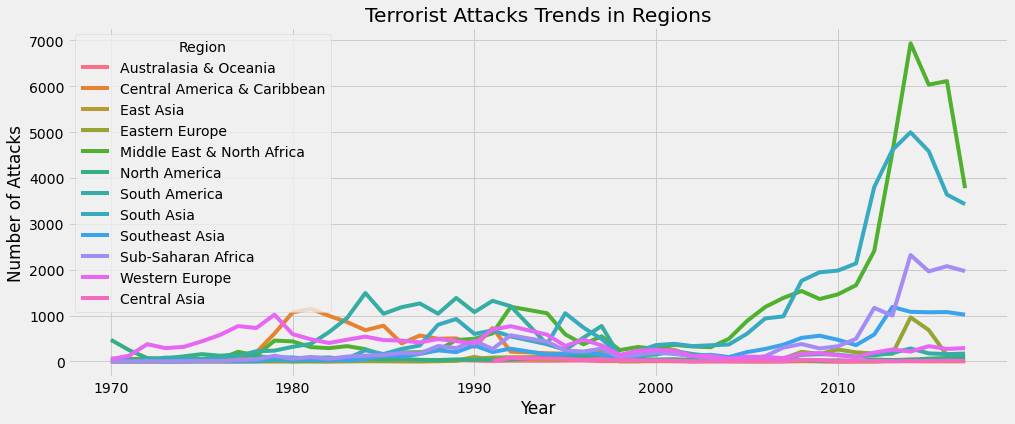

In [18]:
plt.subplots(figsize=(15,6))
sns.lineplot(x='Year',y='count',hue='Region',data=year_attacks_region)
plt.title('Terrorist Attacks Trends in Regions')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

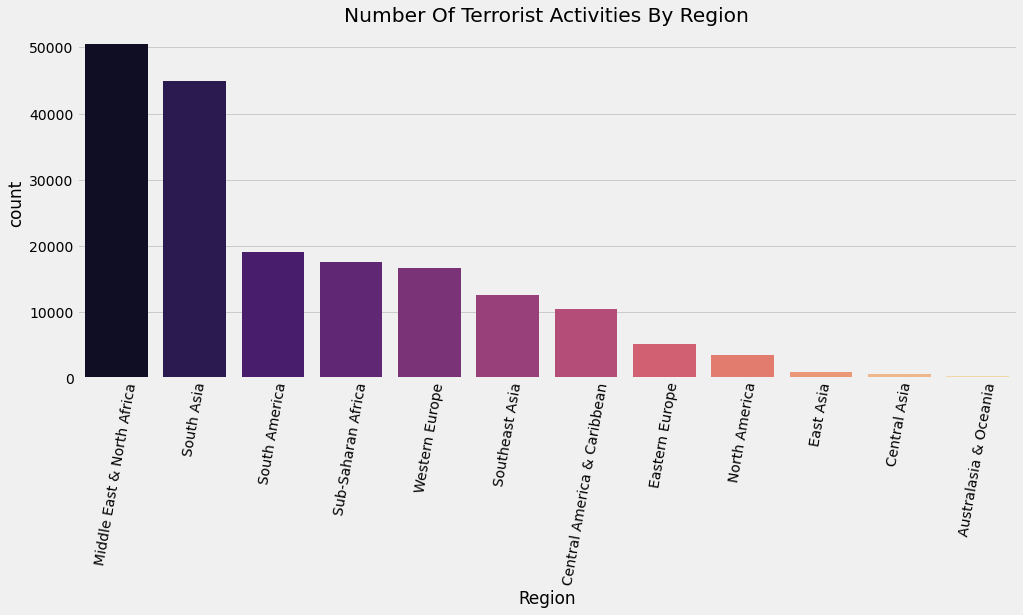

In [19]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Region',data=df,palette='magma',order=df['Region'].value_counts().index)
plt.xticks(rotation=80)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

***Terrorism in the Middle East has experienced repeated increases year after year, largely due to ongoing geopolitical conflicts and the presence of extremist groups. South Asia has also witnessed a rise in terrorism, often linked to criminal organizations and drug trafficking. In contrast, Central Asia has comparatively lower terrorism rates***

## Top 10 Affected Countries

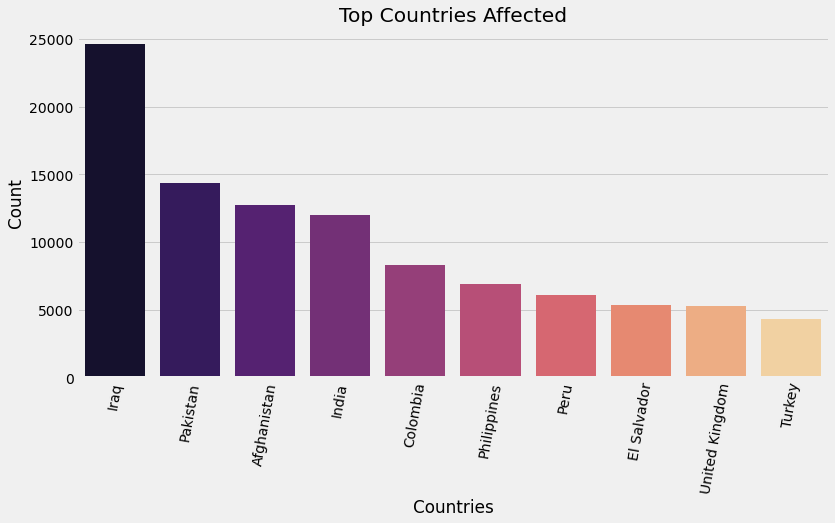

In [20]:
plt.subplots(figsize=(12,6))
top=df['Country'].value_counts()[:10].to_frame().reset_index()
top.columns= ['Country','Attacks_Counts']
sns.barplot(x='Country',y='Attacks_Counts', data= top, palette='magma')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

**The graph highlights five countries most affected by terrorism:**

1. Iraq
2. Pakistan
3. Afghanistan
4. India 
5. Colombia

**These nations face significant challenges related to terrorism, requiring ongoing efforts to ensure the safety and security of their populations and regional stability.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Baghdad'),
  Text(2, 0, 'Karachi'),
  Text(3, 0, 'Lima'),
  Text(4, 0, 'Mosul'),
  Text(5, 0, 'Belfast'),
  Text(6, 0, 'Santiago'),
  Text(7, 0, 'Mogadishu'),
  Text(8, 0, 'San Salvador'),
  Text(9, 0, 'Istanbul'),
  Text(10, 0, 'Athens'),
  Text(11, 0, 'Bogota'),
  Text(12, 0, 'Kirkuk'),
  Text(13, 0, 'Beirut'),
  Text(14, 0, 'Medellin'),
  Text(15, 0, 'Benghazi'),
  Text(16, 0, 'Peshawar'),
  Text(17, 0, 'Quetta'),
  Text(18, 0, 'Guatemala City'),
  Text(19, 0, 'Baqubah')])

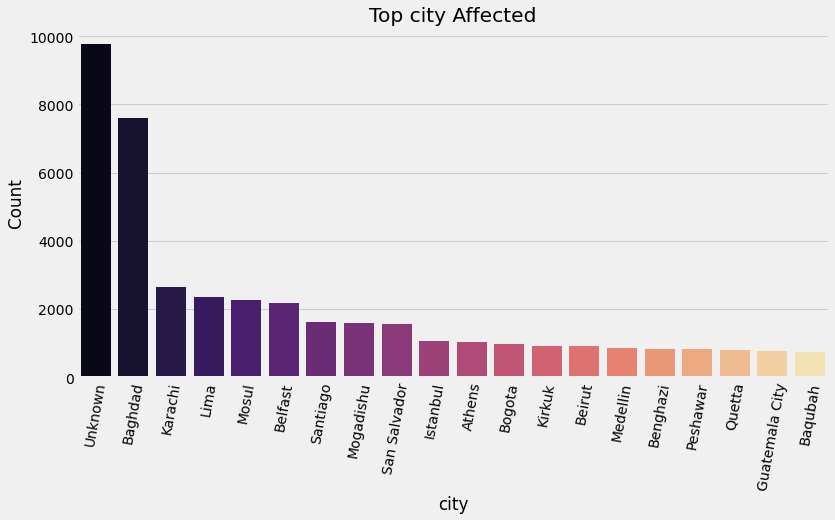

In [21]:
plt.subplots(figsize=(12,6))
top=df['city'].value_counts()[:20].to_frame().reset_index()
top.columns= ['city','Attacks_Counts']
sns.barplot(x='city',y='Attacks_Counts', data= top, palette='magma')
plt.title('Top city Affected')
plt.xlabel('city')
plt.ylabel('Count')
plt.xticks(rotation=80)

## Attacking Methods by Terrorists

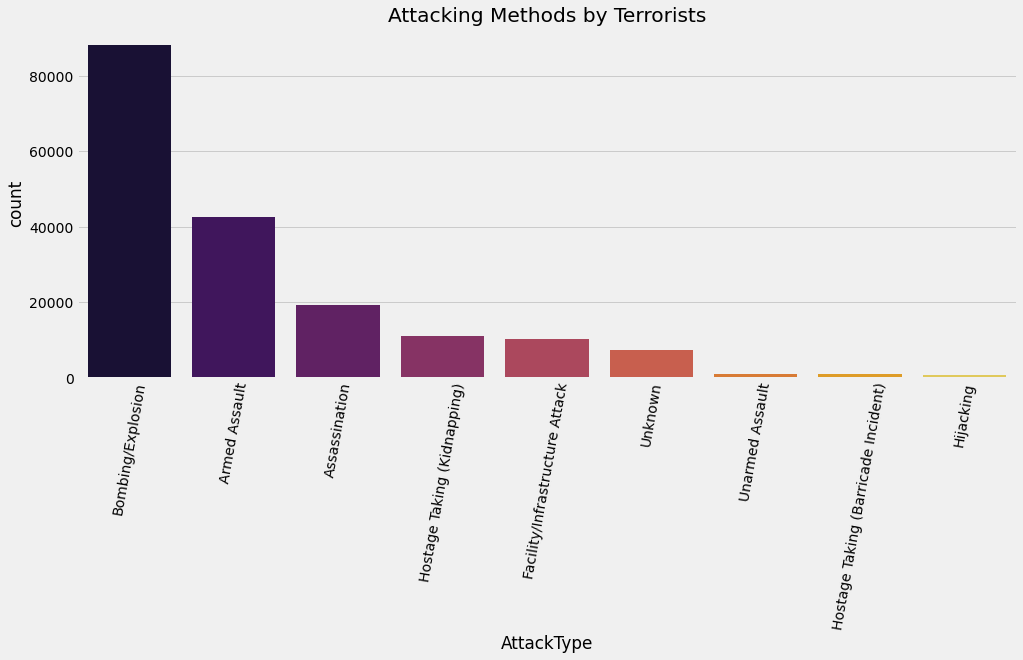

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot(x='AttackType',data=df,palette='inferno',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=80)
plt.title('Attacking Methods by Terrorists')
plt.show()

## Top Terrorists Group

In [23]:
group_counts = df['Group'].value_counts()
sort = group_counts.sort_values(ascending=False)

# Select the top 5 most frequent groups
sort = sort.iloc[1:]
top_5 = sort.head(10)

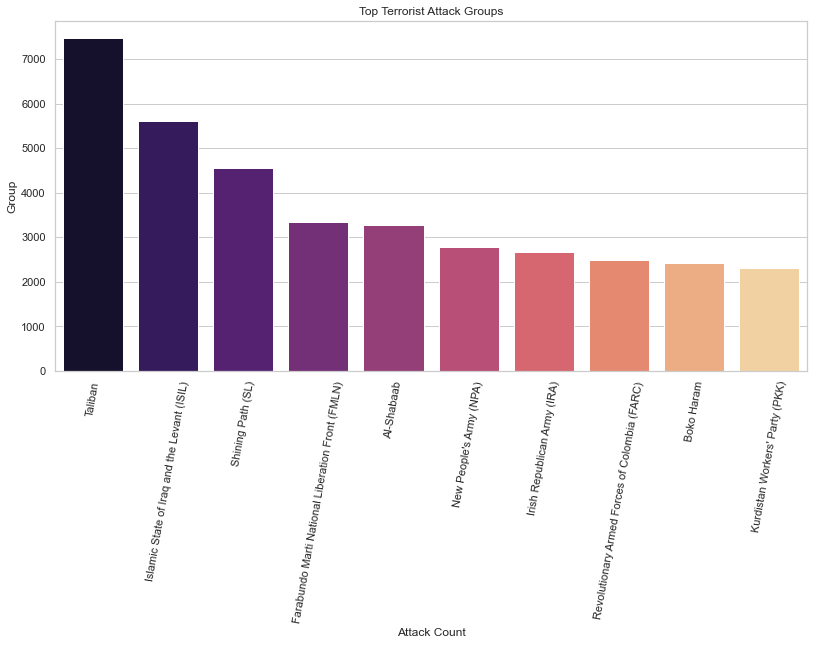

In [24]:
# Plotting top 5 terrorists groups

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5.index, y=top_5.values, palette="magma")
plt.title('Top Terrorist Attack Groups')
plt.xlabel('Attack Count')
plt.ylabel('Group')
plt.xticks(rotation = 80)
plt.show()

**The Taliban is a prominent terrorist group, but it's important to note that the global terrorism landscape is complex. Other significant terrorist groups, like ISIS, Al-Qaeda, Boko Haram, and Al-Shabaab, also operate in various regions, making it challenging to definitively label one as the "most active" worldwide. The prominence of these groups can change over time.**

## Activity of Top Terrorist Groups

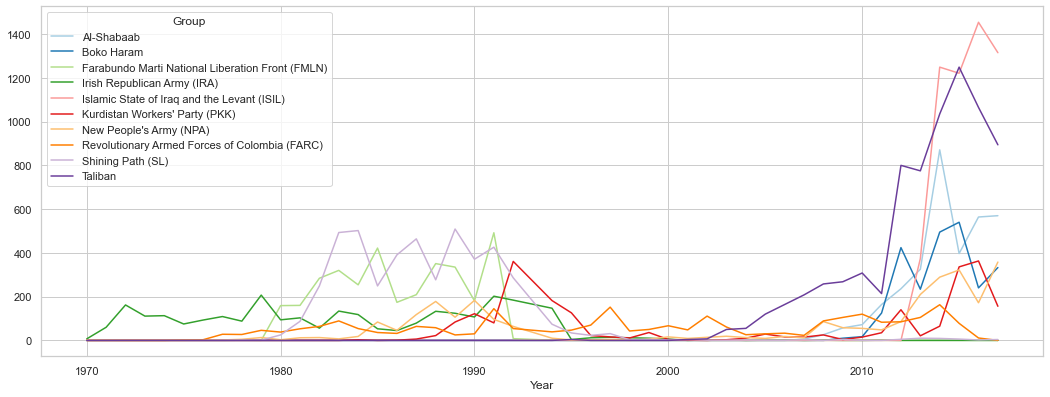

In [25]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

## Regions Attacked By Terrorist Groups

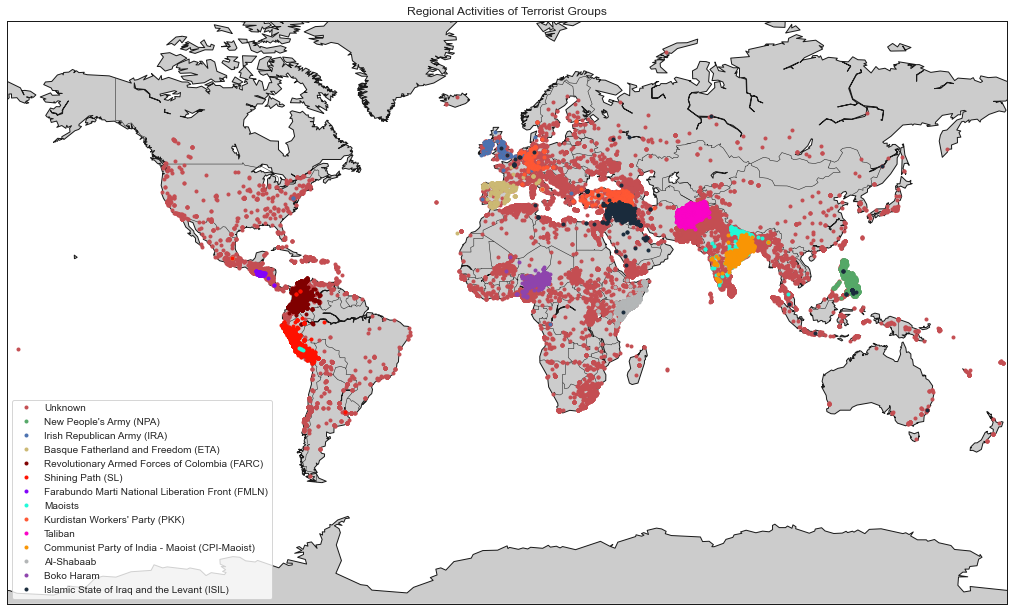

In [26]:
top_groups=df[df['Group'].isin(df['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='#fff')
m4.drawmapboundary(fill_color='#fff')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
plt.show()

# People Killed and Wounded In Each Year

In [27]:
k=df[["Year","Killed"]].groupby("Year").sum()

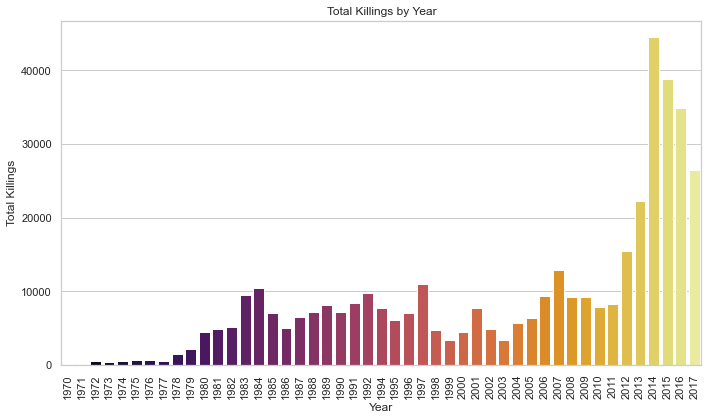

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=k.index, y="Killed", palette="inferno",data=k)

plt.title("Total Killings by Year")
plt.xlabel("Year")
plt.ylabel("Total Killings")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [29]:
k=df[["Year","Wounded"]].groupby("Year").sum()

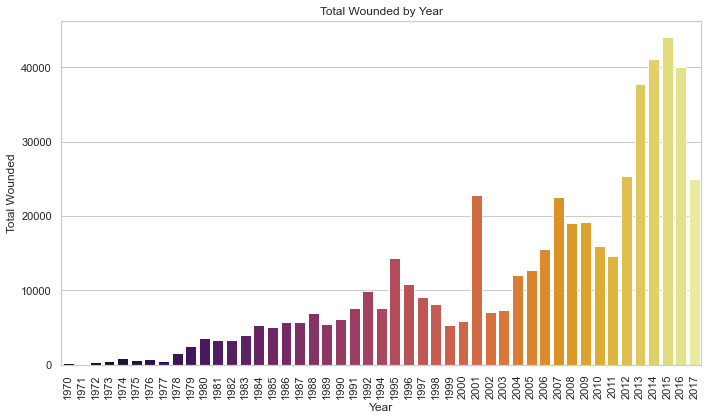

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=k.index, y="Wounded", palette="inferno",data=k)

plt.title("Total Wounded by Year")
plt.xlabel("Year")
plt.ylabel("Total Wounded")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## People Killed and Wounded In Each Region

In [31]:
k=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
k

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [32]:
w=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
w

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


<function matplotlib.pyplot.show(close=None, block=None)>

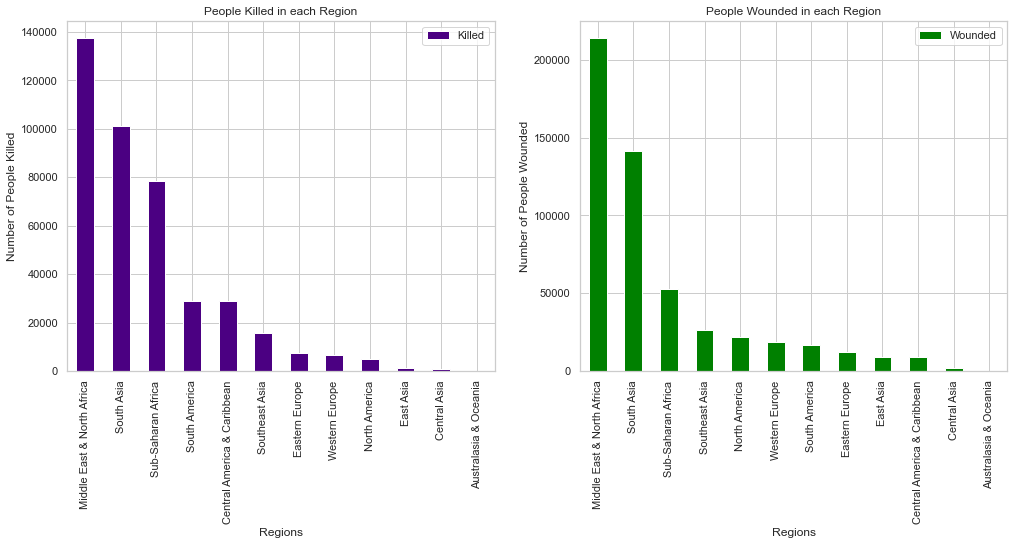

In [33]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#People Killed
k.plot(kind="bar",color="indigo",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#People Wounded
w.plot(kind="bar",color="green",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show

## Types of terrorist attacks that cause deaths

In [34]:
killData = df.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [35]:
attackData = df.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)

In [36]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


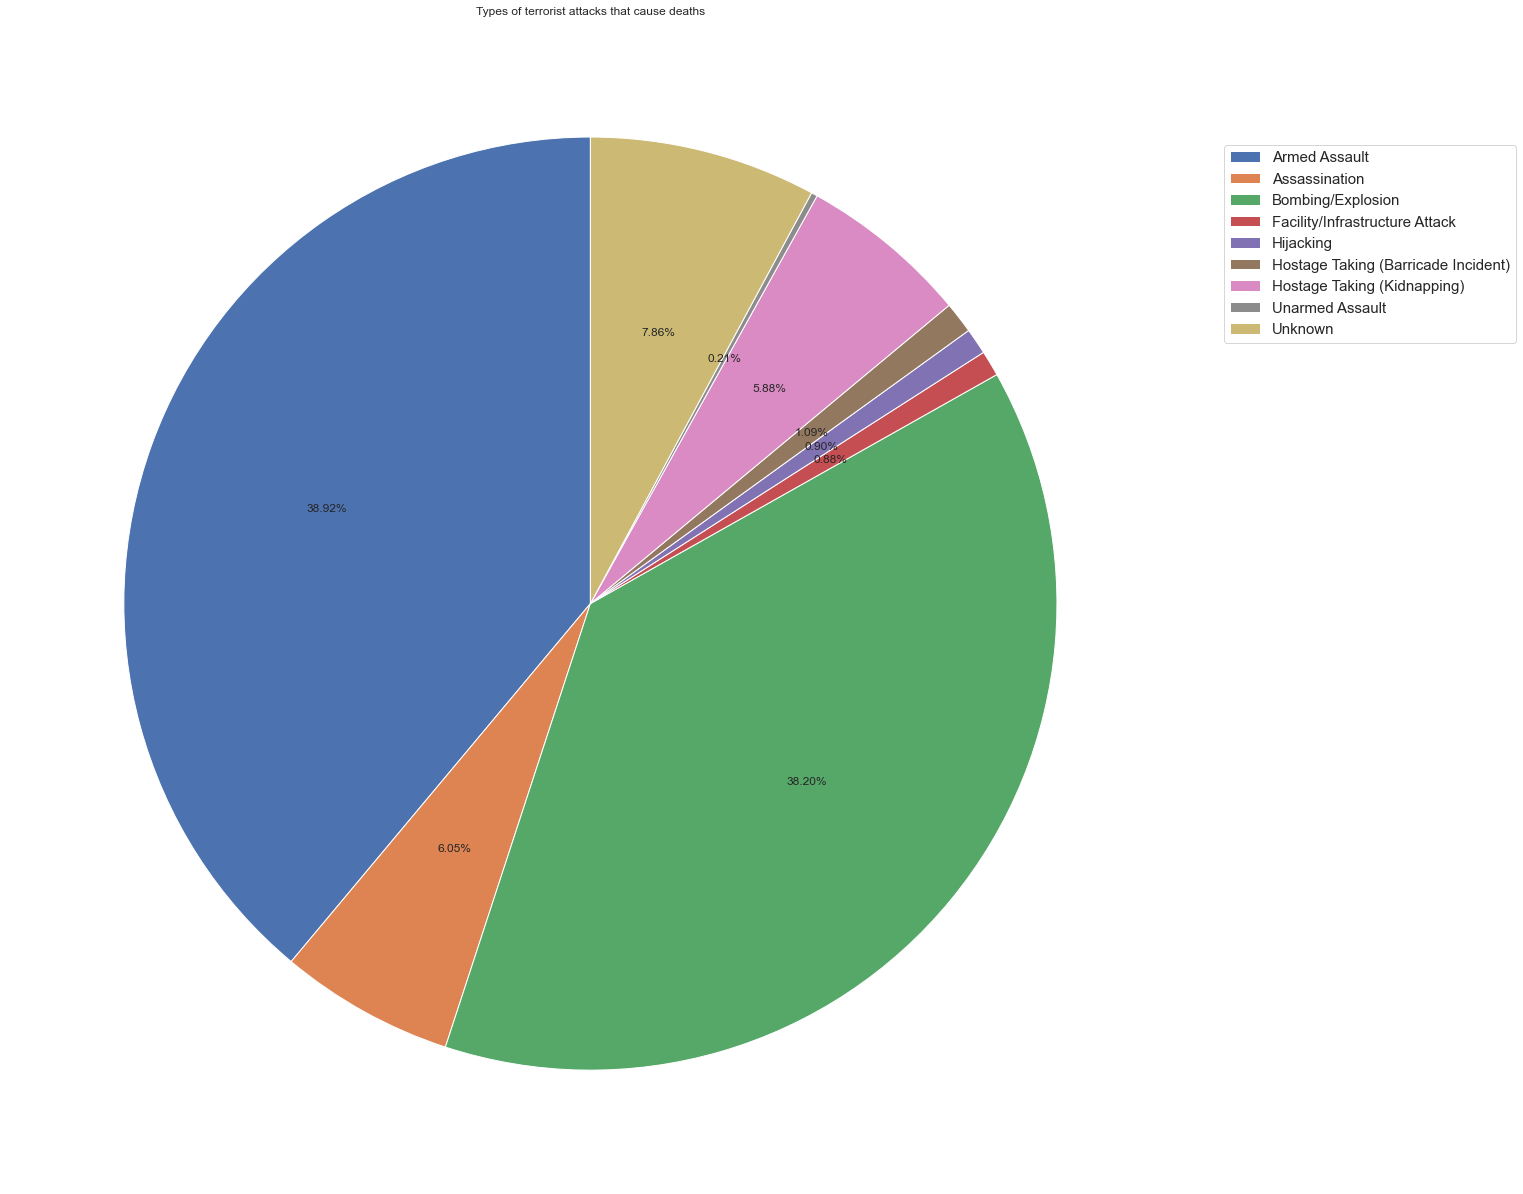

In [37]:

labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze

# Assuming values is a 2D array
values = transpoze.values.tolist()
values = np.array(values).flatten()  # Flatten the 2D array to make it 1D

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)  # location legend
plt.show()


**The combination of armed assaults and bombings/explosions is responsible for a significant 77% of fatalities in terrorist attacks. This highlights the persistent use of these tactics and underscores the global threat posed by weapons and explosives.**

## Yearly Casualities

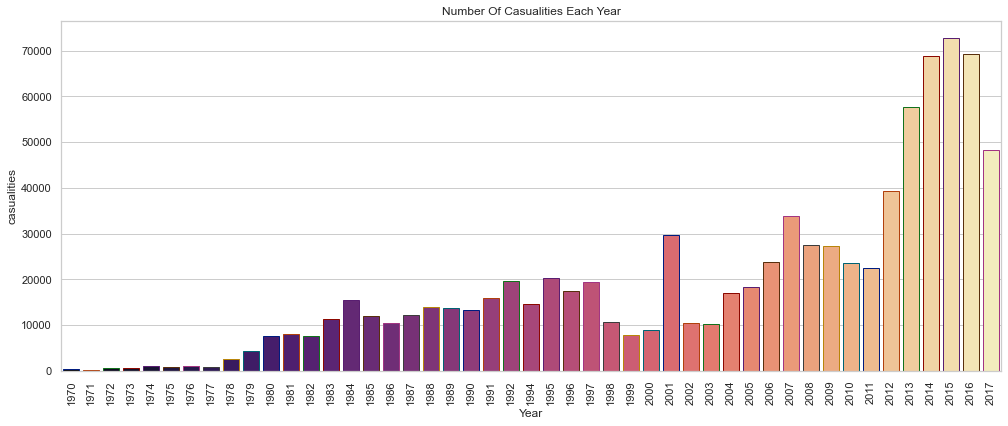

In [38]:
plt.subplots(figsize=(15,6))
year_cas = df.groupby('Year').casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','casualities']
sns.barplot(x=year_cas.Year, y=year_cas.casualities, palette='magma',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

## Number of Total Casualities in Each Country

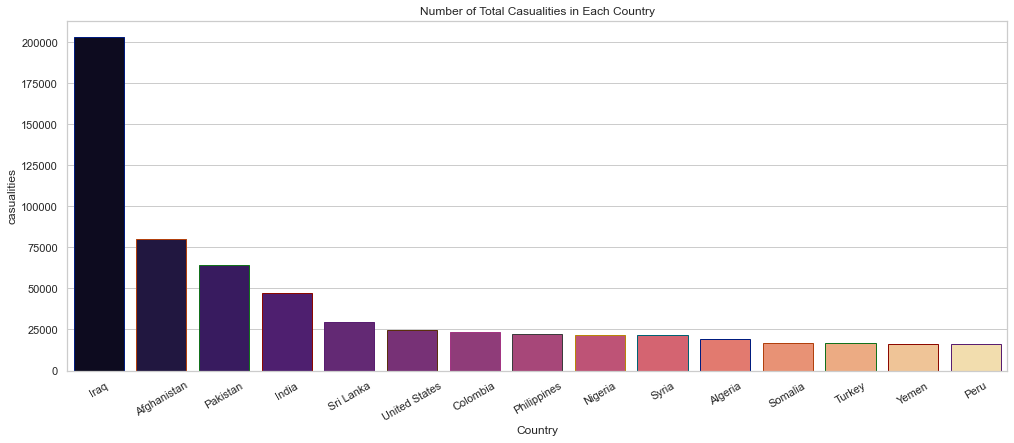

In [39]:
plt.subplots(figsize=(15,6))
count_cas = df.groupby('Country').casualities.sum().to_frame().reset_index().sort_values('casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.casualities, palette= 'magma',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Casualities in Each Country')
plt.show()

# Terrorist Attacks in India

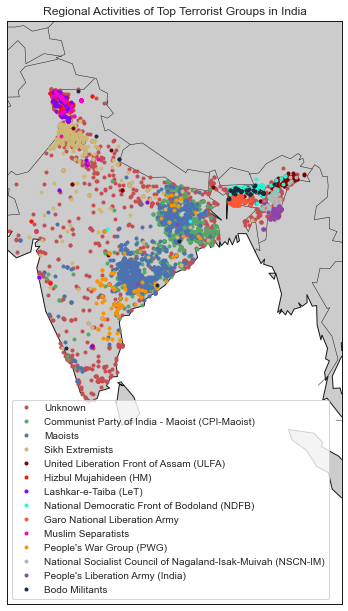

In [40]:
india_data = df[df['Country'] == 'India']

# Get the top 14 terrorist groups in India
top_groups = india_data['Group'].value_counts().head(14).index

# Create a Basemap instance
m4 = Basemap(
    projection='mill',
    llcrnrlat=-10,
    urcrnrlat=40,
    llcrnrlon=70,
    urcrnrlon=100,
    resolution='c',
    lat_0=True,
    lat_1=True
)

# Customize the map
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='#fff')
m4.drawmapboundary(fill_color='#fff')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(22, 10)

# Define colors for plotting
colors = ['r', 'g', 'b', 'y', '#800000', '#ff1100', '#8202fa', '#20fad9', '#ff5733', '#fa02c6', "#f99504", '#b3b6b7', '#8e44ad', '#1a2b3c']

# Iterate through the top groups and plot their activities
for group, color in zip(top_groups, colors):
    group_data = india_data[india_data['Group'] == group]
    x_group, y_group = m4(group_data['longitude'].values, group_data['latitude'].values)
    m4.plot(x_group, y_group, 'go', markersize=3, color=color, label=group)

# Add legend
plt.legend(loc='lower left', frameon=True, prop={'size': 10})

# Set the plot title
plt.title('Regional Activities of Top Terrorist Groups in India')

# Show the plot
plt.show()


In [41]:
India = df[(df['Country'] == 'India')]
India.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,...,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success,casualities
1186,197202220004,1972,2,22,India,South Asia,Delhi,New Delhi,28.585836,77.153336,...,0.0,0.0,B-747,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,1,0.0
2764,197501190004,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,...,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,Unknown,1,4.0
3857,197605260001,1976,5,26,India,South Asia,Delhi,New Delhi,28.585836,77.153336,...,0.0,0.0,New Delhi airport,NaN,Unknown,Airports & Aircraft,Explosives,NaN,1,0.0
5327,197709280004,1977,9,28,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,...,0.0,0.0,DC-8,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,1,0.0
7337,197901130004,1979,1,13,India,South Asia,Assam,Unknown,26.200605,92.937574,...,NaN,NaN,patrol,NaN,Naga People,Police,Firearms,NaN,1,NaN


In [42]:
India_attacks = India['eventid'].count()
print('There were',India_attacks ,'attacks in India.')

There were 11960 attacks in India.


In [43]:
India_success = India.groupby('success').size().reset_index(name='count')
India_success['percentage'] = India_success['count'] / India_attacks * 100
India_success

,success,count,percentage
0,0,1680,14.046823
1,1,10280,85.953177


Text(0.5, 0, 'Outcome')

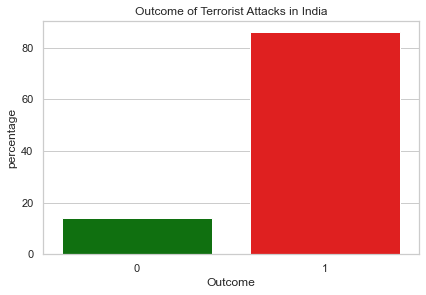

In [44]:
sns.barplot(x='success', y='percentage', data = India_success,palette=['green', 'red'])
plt.title("Outcome of Terrorist Attacks in India")
plt.xlabel("Outcome")

## Attack types in India and their success rates.

In [45]:
attack_types_India = India.groupby(['AttackType','success']).size().reset_index(name='count')
attack_types_India


,AttackType,success,count
0,Armed Assault,0,244
1,Armed Assault,1,2940
2,Assassination,0,228
3,Assassination,1,1001
4,Bombing/Explosion,0,1128
5,Bombing/Explosion,1,3697
6,Facility/Infrastructure Attack,0,33
7,Facility/Infrastructure Attack,1,963
8,Hijacking,0,4
9,Hijacking,1,39


Text(0.5, 1.0, 'Facility ')

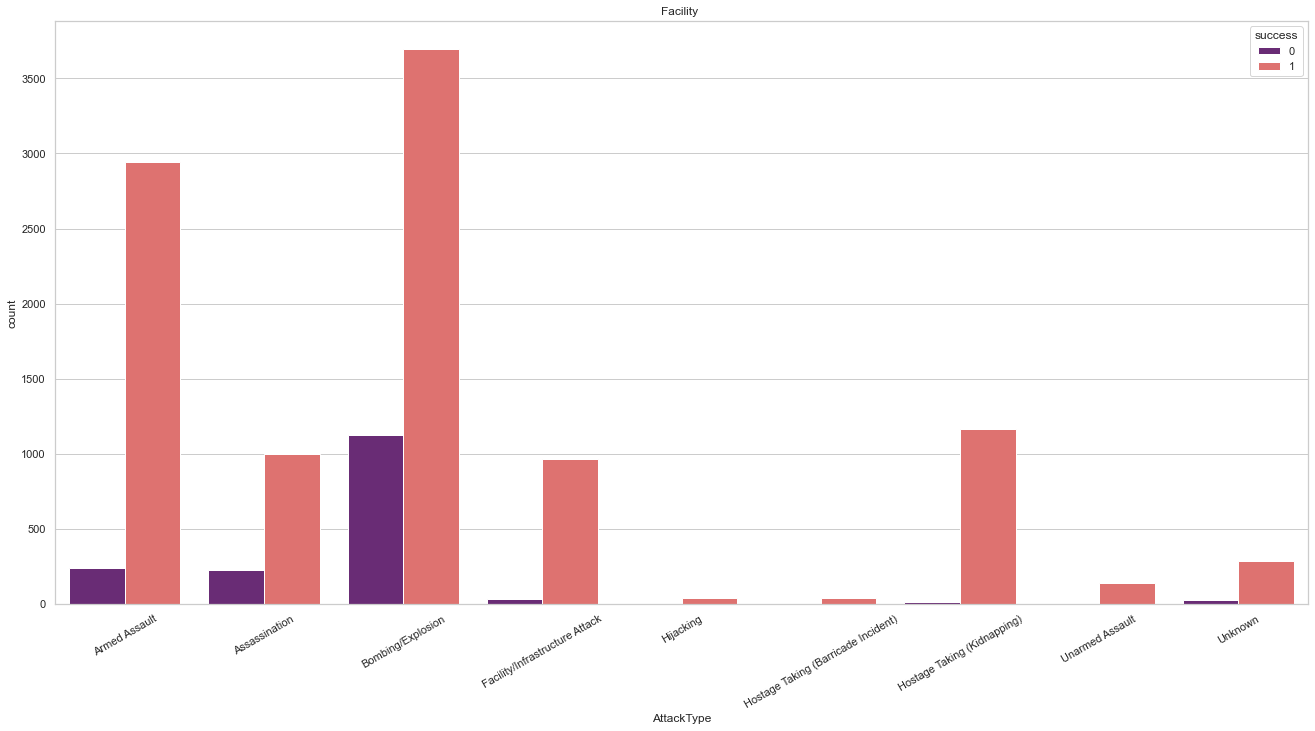

In [46]:
plt.figure(figsize=(20,10))
sns.barplot(x='AttackType', y='count', hue='success', data=attack_types_India,  palette= 'magma')
plt.xticks(rotation=30)
plt.title("Facility ")

In [47]:
nkills_India = India.groupby('AttackType')[['Killed']].sum().reset_index()
nkills_India

,AttackType,Killed
0,Armed Assault,9378.0
1,Assassination,2001.0
2,Bombing/Explosion,5830.0
3,Facility/Infrastructure Attack,135.0
4,Hijacking,42.0
5,Hostage Taking (Barricade Incident),136.0
6,Hostage Taking (Kidnapping),819.0
7,Unarmed Assault,28.0
8,Unknown,972.0


<AxesSubplot:xlabel='AttackType', ylabel='Killed'>

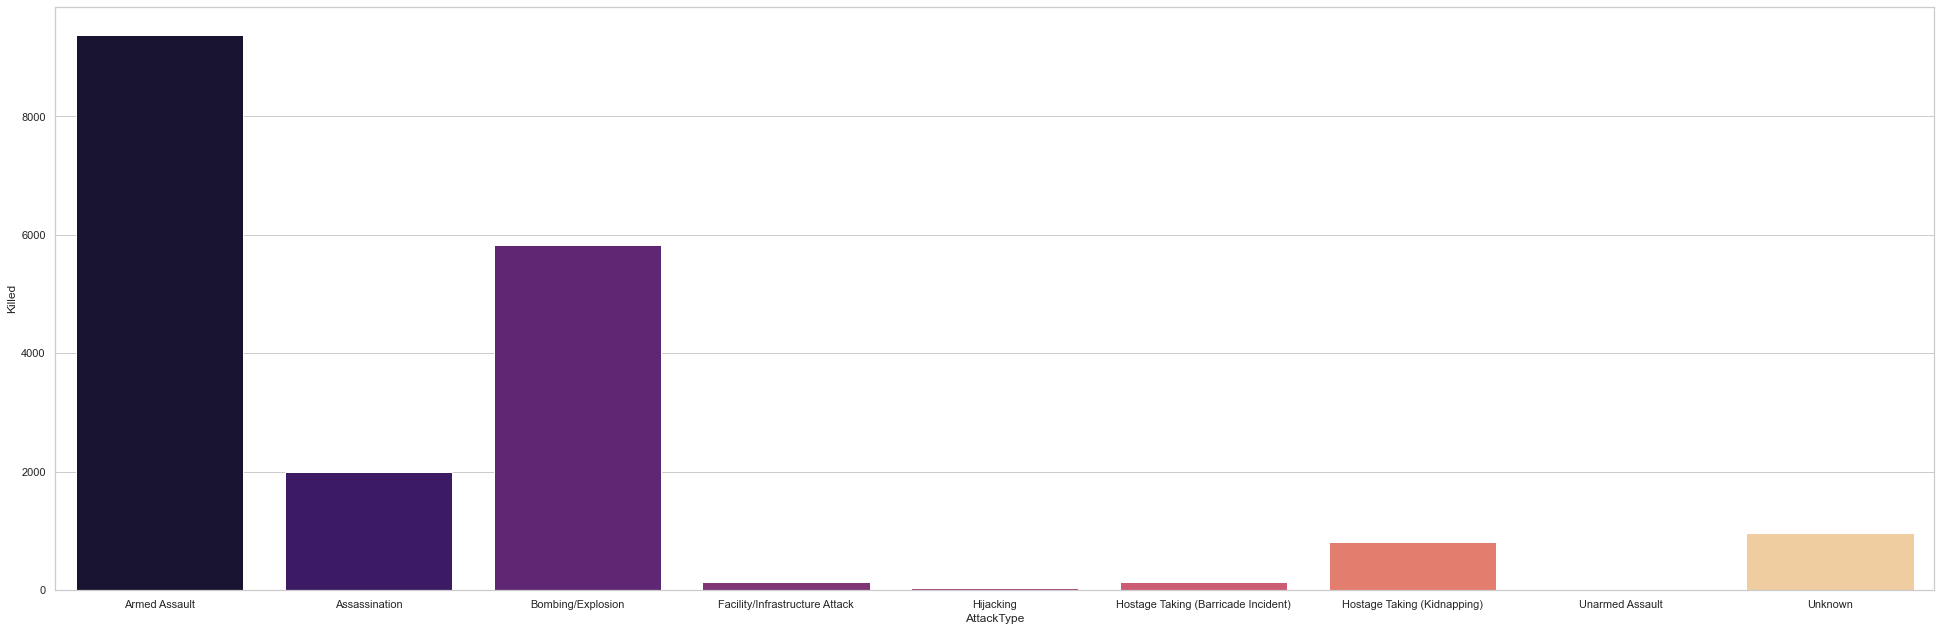

In [48]:
plt.figure(figsize=(30,10))
sns.barplot(x='AttackType', y='Killed', data=nkills_India,palette= 'magma')

# Conclusion

**The global landscape is witnessing a concerning rise in the incidence of terrorism attacks, posing a growing threat to peace and security. This unsettling trend is particularly pronounced in two regions: the Middle East and North Africa, as well as South America, where the number of terrorist attacks has surged significantly.**

**One of the striking aspects of this worrisome phenomenon is the high rate of success achieved by terrorist groups and individuals. Alarmingly, a staggering 89% of these attacks have been successful, resulting in a range of devastating consequences for the affected populations. This success rate underscores the effectiveness and persistence of these malicious actors in carrying out their destructive agendas.**

**Furthermore, the data reveals that the use of bombings and explosions as tactics in these attacks has inflicted the most casualties. These incidents not only lead to loss of life but also cause severe injuries and widespread damage to property and infrastructure. The prevalence of such tactics highlights the devastating impact of explosive devices and the need for comprehensive efforts to counteract the proliferation and use of explosives on a global scale.**

**As terrorism continues to pose a significant global challenge, addressing the root causes, enhancing intelligence and security measures, and promoting international cooperation remain crucial in mitigating the impact and working toward a more secure and peaceful world.**

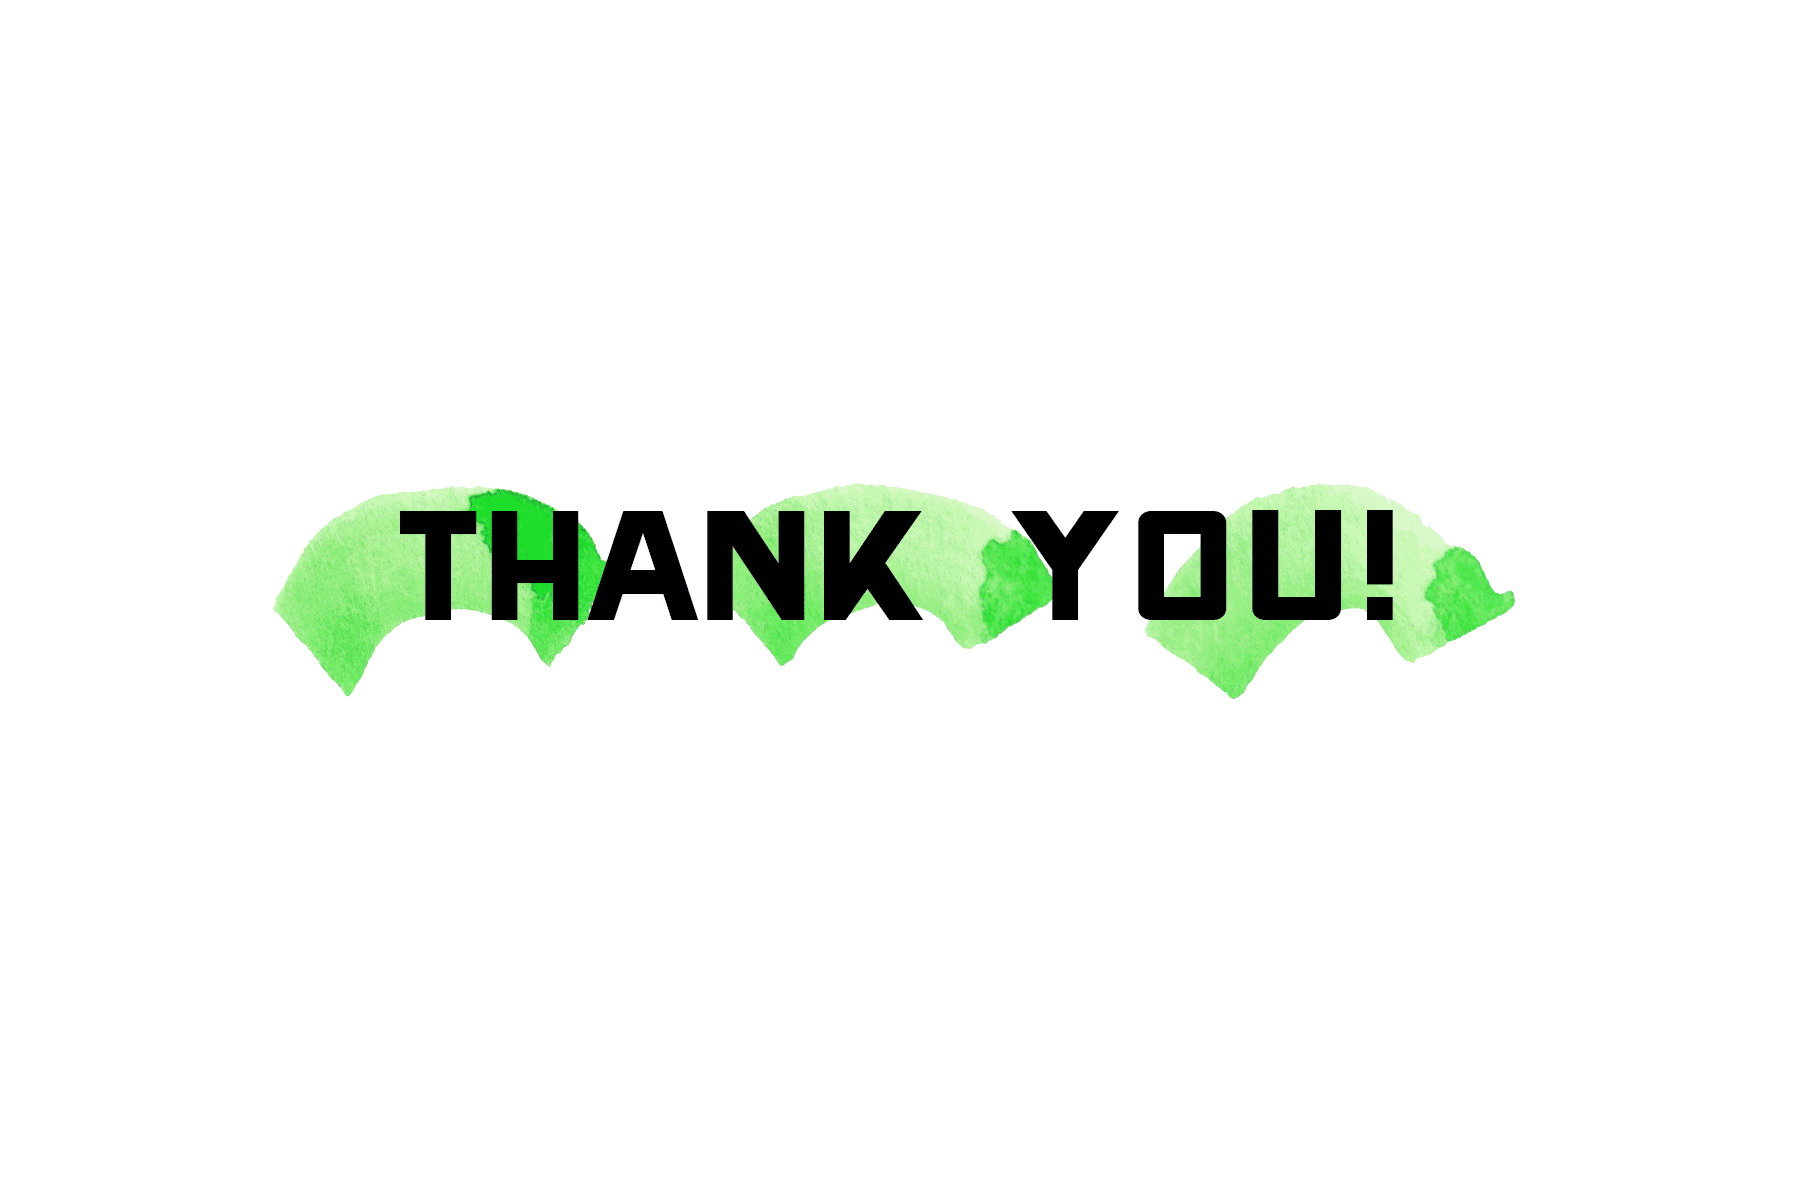